<a href="https://colab.research.google.com/github/juan46buitrago/ia_2025/blob/main/K_MEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-MEANS
Metodo de agrupamiento que duvude un conjubnto de datos en Kgrupos o clusteres a partir de centorids

## practica
analizar el archio analisis .csv en donde se evalua a las luz del ocean:the five aspectos de la presoalidad de diferente figuras publicas en X
*usuario:el nombre de la figura publica en X
*op:openness to experience
*"ex": extraversion
*"ag": agreblenss
*"ne": neurotiscm
*wordcount:cantidad de palabras usadas en lso twets
*categoria:actividad laborla de usaurio

### categorias
1. actors/actriz
2. cantante
3.modelor
4.tv,series
5.radio
6. tecnologia
7. deportes
8.politica
9.escritores

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
#plt.rcParams["figures.figsize"]=(16,9)
plt.style.use("ggplot")

In [60]:
dataframe=pd.read_csv('analisis.csv')
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [61]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [62]:
dataframe.groupby("categoria").size()

,0
categoria,
1,27
2,34
3,9
4,19
5,4
6,8
7,17
8,16
9,6


#visaulizacion de datos

<function matplotlib.pyplot.show(close=None, block=None)>

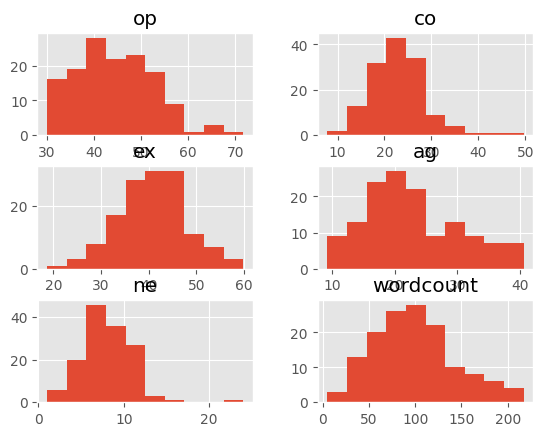

In [63]:
dataframe.drop(columns=["categoria"]).hist()
plt.show

se selecionara como dimensiones op,  ex y ag se cruzara añguna psita de agrupacion y relacion entre categoria

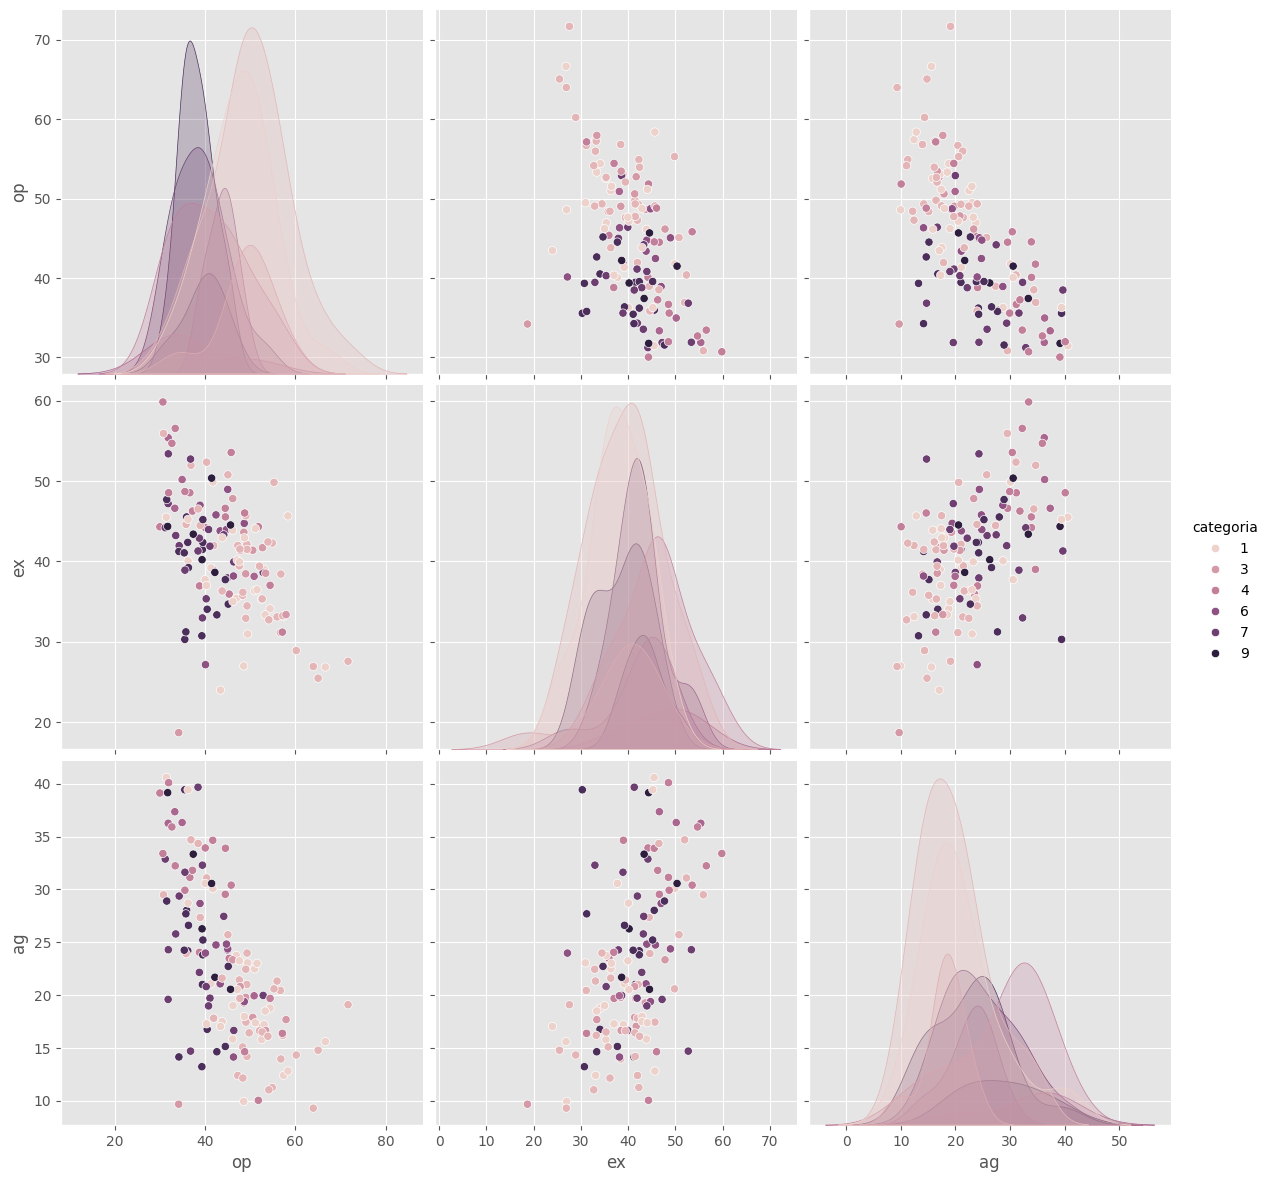

In [64]:
from numpy._core.fromnumeric import var
sns.pairplot(dataframe, hue="categoria", height=4, vars=["op","ex","ag"], kind="scatter")
plt.show()

revisando la grafica no se observa ongun ti´p de agrupacion o correlacionentre los usuarios y sus catagorias

##Definicion de entrada
se concreta la estrucutra de datos que se emplara para alimenta el algortimo

In [65]:
X=np.array(dataframe[["op","ex","ag"]])
y=np.array(dataframe["categoria"])
X.shape

(140, 3)

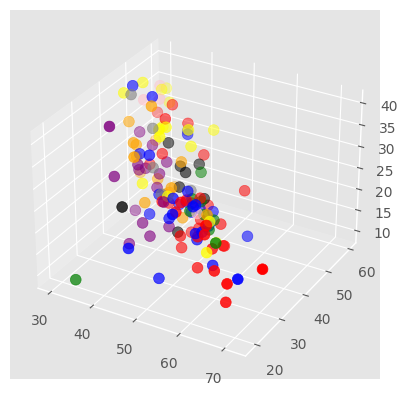

In [66]:
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
colores=["blue","red","green","yellow","pink","black","orange","purple","grey","brown"]
asignar=[]
for row in y:
  asignar.append(colores[row-1])
ax.scatter(X[:,0],X[:,1],X[:,2],c=asignar,s=60)

## obtener la cantidad de centroides-obtener el valor de K
se empleara la metodologia del "punto de codo" para hallar la cantidad de centoides

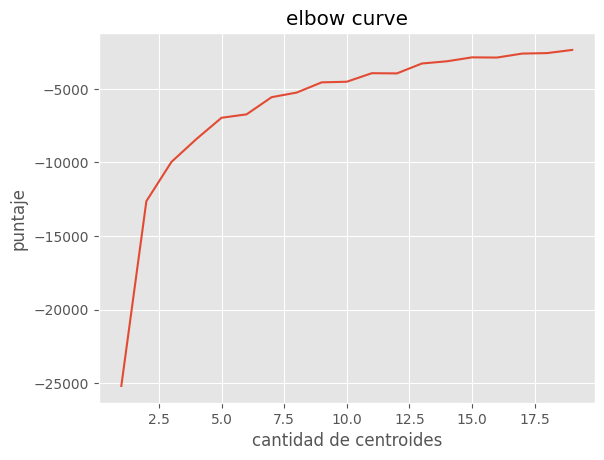

In [67]:
Nc=range(1,20)
Kmeans=[KMeans(n_clusters=i) for i in Nc]
Kmeans
score=[Kmeans[i].fit(X).score(X) for i in range(len(Kmeans))]
score
plt.plot(Nc,score)
plt.xlabel("cantidad de centroides")
plt.ylabel("puntaje")
plt.title("elbow curve")
plt.show()

debido

##2. Ejecucaion de K-MEAN
obtener la ubicacion de los 5 centroides

In [68]:
Kmeans=KMeans(n_clusters=5).fit(X)
centroids=Kmeans.cluster_centers_
print(centroids)

[[37.877839   51.23863447 27.52273312]
 [57.44424027 33.20625036 15.56946505]
 [33.79746854 47.58968892 37.36774485]
 [46.60155339 38.74834637 18.57530153]
 [38.67198052 41.40024917 28.15364638]]


insetar llos puntos en grafica 3D

/tmp/ipython-input-958125387.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig=plt.figure()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

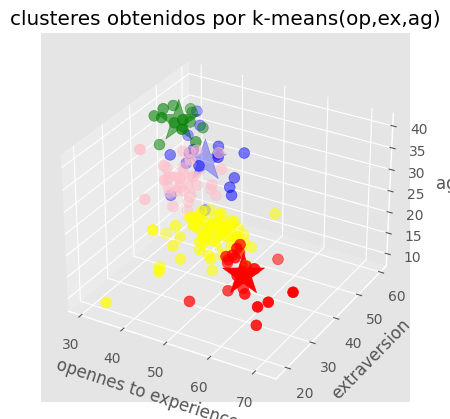

In [69]:
#PREDICIENDOLOS CLUSTERS
labels=Kmeans.predict(X)
#colocando los puntos junto con los clusters
c=Kmeans.cluster_centers_
colores=["blue","red","green","yellow","pink"]
asignar=[]
for row in labels:
  asignar.append(colores[row])
  fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.scatter(X[:,0],X[:,1],X[:,2],c=asignar,s=60)
ax.scatter(c[:,0],c[:,1],c[:,2],marker="*",color=colores,s=1000)
ax.set_xlabel("opennes to experience")
ax.set_ylabel("extraversion")
ax.set_zlabel("ag")
ax.set_title("clusteres obtenidos por k-means(op,ex,ag)")
plt.show()


se puede observar como Means ha agrupado 150 usuarios de x en 5 clusters de acuerdo a la personalidad de openness, extraversion y agreaabless

Text(0.5, 1.0, 'opennes to experience vs extraversion')

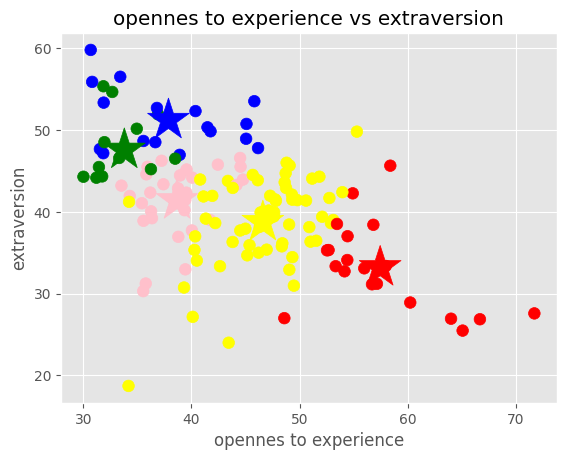

In [70]:
#graficando op vs ex
f1=dataframe["op"].values
f2=dataframe["ex"].values
plt.scatter(f1,f2,c=asignar,s=70)
plt.scatter(centroids[:,0],centroids[:,1],marker="*",c=colores,s=1000)
plt.xlabel("opennes to experience")
plt.ylabel("extraversion")
plt.title("opennes to experience vs extraversion")

In [72]:
copy=pd.DataFrame()
copy["usuario"]=dataframe["usuario"].values
copy["categoria"]=dataframe["categoria"].values
copy["label"]=labels;
candtidadGrupo=pd.DataFrame()
candtidadGrupo["color"]=colores
candtidadGrupo["cantidad"]=copy.groupby("label").size()
candtidadGrupo

,color,cantidad
0,blue,17
1,red,22
2,green,13
3,yellow,59
4,pink,29


para finalizar, se debe categorizar cada grupo respecto a sus profesiones. para este ejemplo se va identificar cuantas de esasa porfesione pertenece a cluster rojo(0)

In [76]:
group_referrer_index=copy["label"]==0
group_referrals = copy[group_referrer_index]
diversidadGrupo=pd.DataFrame()
diversidadGrupo["categoria"]=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo["cantidad"]=group_referrals.groupby("categoria").size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,1.0
2,2,3.0
3,3,1.0
4,4,5.0
5,5,NaN
6,6,2.0
7,7,3.0
8,8,1.0
9,9,1.0


In [80]:
#para ver el representate de ada cluster(el as cercano)
closest,_=pairwise_distances_argmin_min(Kmeans.cluster_centers_,X)
closest

array([77, 75, 80,  8, 65])

In [81]:
user=dataframe['usuario'].values
for row in closest:
  print(user[row])

jordievole
JLo
JPVarsky
andyroddick
iescolar


In [82]:
X_new=np.array([[45.93,57.74,15.66]])
new_labels=Kmeans.predict(X_new)
print(new_labels)


[0]
